In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.manifold import Isomap, TSNE, MDS
import random
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
data = pd.read_csv("genres_v2.csv")

C:\tools\anacondaa\Lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.iloc[:,:20]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN


In [4]:
data.iloc[:,20:]

,Unnamed: 0,title
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
42300,20995.0,Euphoric Hardstyle
42301,20996.0,Greatest Hardstyle Playlist
42302,20997.0,Best of Hardstyle 2020
42303,20998.0,Euphoric Hardstyle


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [6]:
data.nunique()

danceability          890
energy                917
key                    12
loudness            11654
mode                    2
speechiness          1447
acousticness         4602
instrumentalness     4757
liveness             1695
valence              1674
tempo               15606
type                    1
id                  35877
uri                 35877
track_href          35877
analysis_url        35877
duration_ms         26261
time_signature          4
genre                  15
song_name           15439
Unnamed: 0          20780
title                 132
dtype: int64

In [7]:
df = data.drop(["type","type","id","uri","track_href","analysis_url","song_name","Unnamed: 0","title", "duration_ms", "time_signature"], axis =1)

In [8]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,hardstyle
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,hardstyle
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,hardstyle


In [9]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  genre             42305 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 3.9+ MB


In [11]:
df["genre"].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

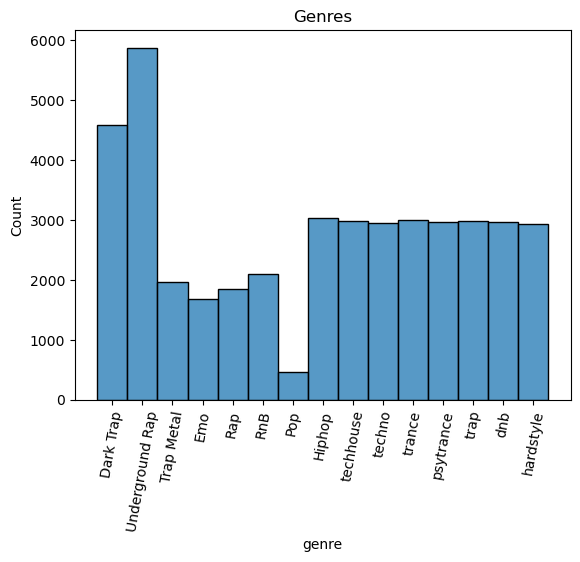

In [12]:
ax = sns.histplot(df["genre"])
_ = plt.xticks(rotation=80)
_ = plt.title("Genres")

In [13]:
df.drop(df.loc[df['genre']=="Pop"].index, inplace=True)
df = df.reset_index(drop = True)

In [14]:
df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.324608,-0.013133,-0.218870,0.085789,0.184211,0.070473,-0.065724,-0.196866,0.369169,-0.167563
energy,-0.324608,1.000000,0.045013,0.603140,-0.031562,-0.150872,-0.495804,0.303650,0.231560,-0.013813,-0.023276
key,-0.013133,0.045013,1.000000,-0.006947,-0.250188,-0.031088,-0.004237,0.068760,0.003343,0.029533,-0.010681
loudness,-0.218870,0.603140,-0.006947,1.000000,-0.004879,0.050098,-0.284931,-0.186337,0.167971,0.076700,0.153185
mode,0.085789,-0.031562,-0.250188,-0.004879,1.000000,0.050455,-0.015634,-0.016375,0.008253,0.023070,-0.011819
speechiness,0.184211,-0.150872,-0.031088,0.050098,0.050455,1.000000,0.163345,-0.392013,0.056733,0.224940,0.166511
acousticness,0.070473,-0.495804,-0.004237,-0.284931,-0.015634,0.163345,1.000000,-0.262410,-0.106497,0.101200,0.054707
instrumentalness,-0.065724,0.303650,0.068760,-0.186337,-0.016375,-0.392013,-0.262410,1.000000,-0.017781,-0.252966,-0.208680
liveness,-0.196866,0.231560,0.003343,0.167971,0.008253,0.056733,-0.106497,-0.017781,1.000000,-0.023217,0.029513
valence,0.369169,-0.013813,0.029533,0.076700,0.023070,0.224940,0.101200,-0.252966,-0.023217,1.000000,0.058152


In [15]:
x = df.loc[:,:"tempo"]
y = df["genre"]

In [16]:
x

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988
...,...,...,...,...,...,...,...,...,...,...,...
41839,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013
41840,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928
41841,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935
41842,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042


In [17]:
y

0        Dark Trap
1        Dark Trap
2        Dark Trap
3        Dark Trap
4        Dark Trap
           ...    
41839    hardstyle
41840    hardstyle
41841    hardstyle
41842    hardstyle
41843    hardstyle
Name: genre, Length: 41844, dtype: object

In [18]:
y.unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance', 'trap',
       'dnb', 'hardstyle'], dtype=object)

C:\tools\anacondaa\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\tools\anacondaa\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\tools\anacondaa\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

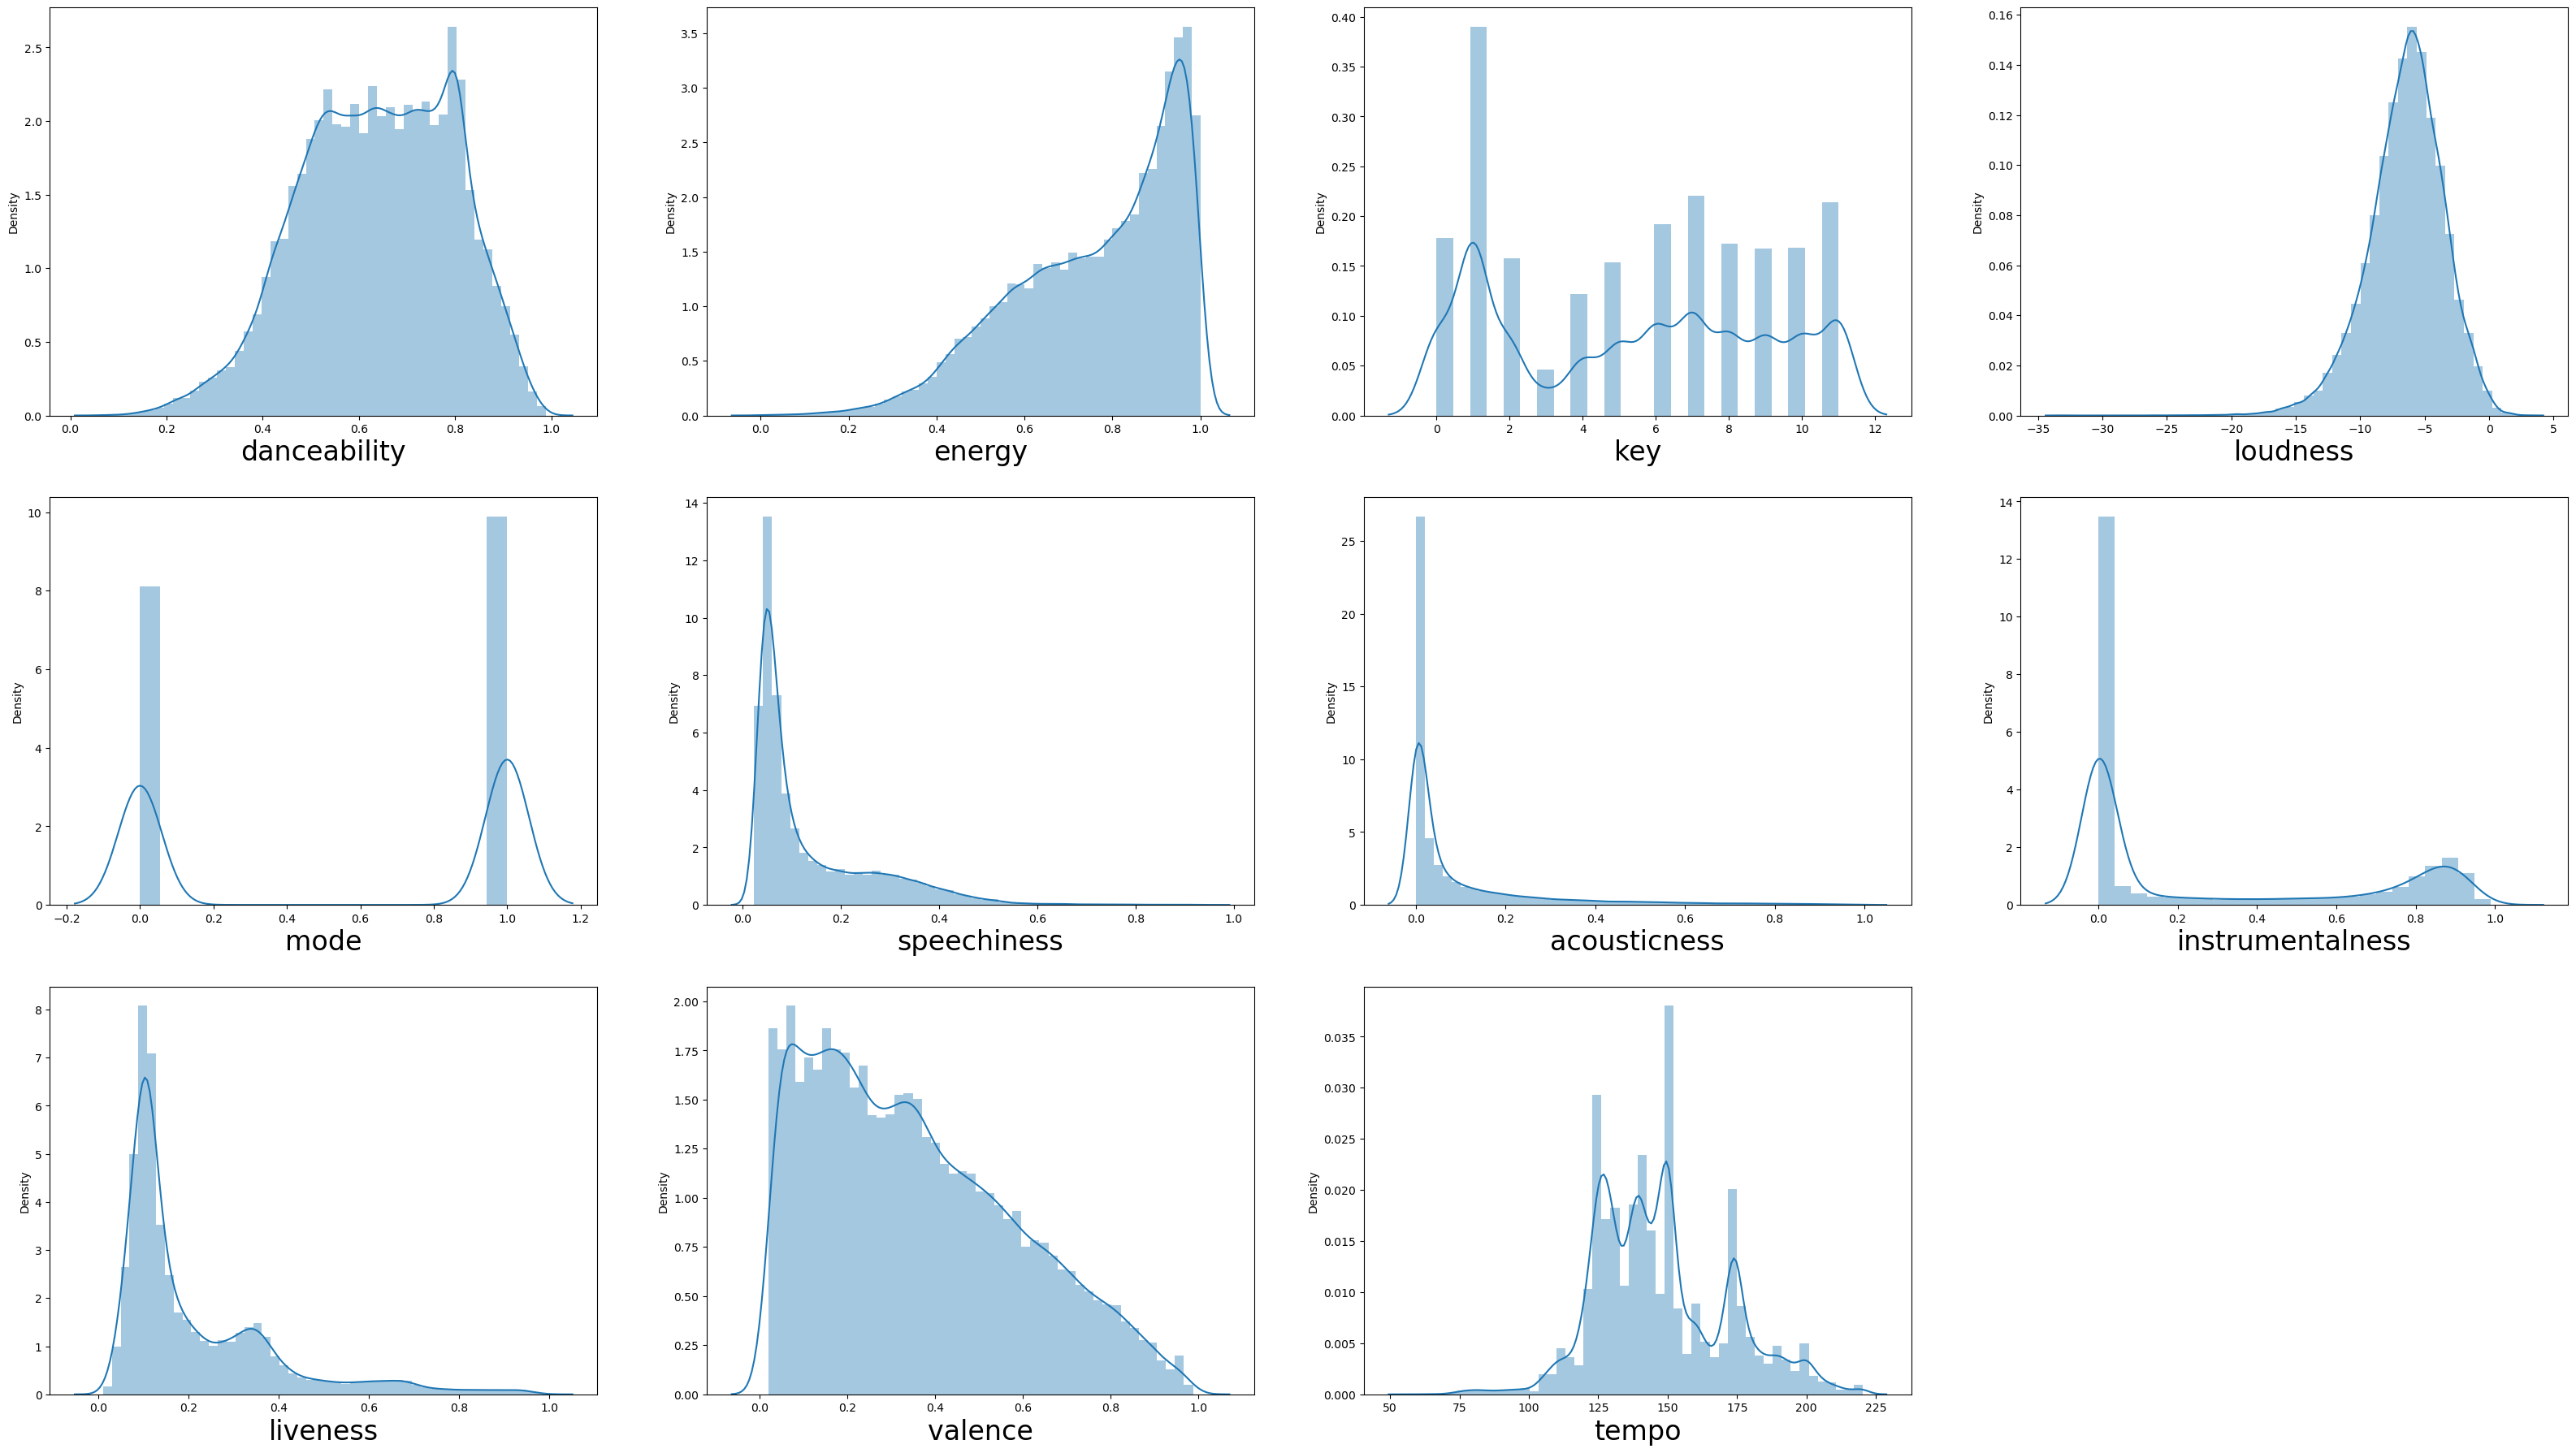

In [19]:
k=0
plt.figure(figsize = (40,30))
for i in x.columns:
    plt.subplot(4,4, k + 1)
    sns.distplot(x[i])
    plt.xlabel(i, fontsize=24)
    k +=1

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=42, shuffle = True)

In [21]:
xtrain.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [22]:
xtrain.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000
mean,0.638809,0.763796,5.382972,-6.467526,0.548559,0.137127,0.095507,0.287004,0.214505,0.355343,147.398774
std,0.156886,0.183906,3.666728,2.943751,0.497644,0.126734,0.170971,0.371588,0.176067,0.232911,23.689341
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.023200,0.000001,0.000000,0.010700,0.018700,61.309000
25%,0.523000,0.633000,1.000000,-8.171000,0.000000,0.049250,0.001680,0.000000,0.099600,0.160000,129.962000
50%,0.645000,0.806000,6.000000,-6.251000,1.000000,0.075700,0.016000,0.007240,0.135000,0.319000,144.976000
75%,0.766000,0.923000,9.000000,-4.510000,1.000000,0.195000,0.105000,0.729000,0.295000,0.520000,160.968500
max,0.988000,1.000000,11.000000,3.108000,1.000000,0.944000,0.986000,0.989000,0.981000,0.988000,220.290000


In [23]:
col = xtrain.columns

scalerx = MinMaxScaler()

xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)

xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)

In [24]:
xtrain.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000,33475.000000
mean,0.621638,0.763738,0.489361,0.737405,0.548559,0.123726,0.096862,0.290196,0.210043,0.347305,0.541510
std,0.169993,0.183950,0.333339,0.080728,0.497644,0.137635,0.173399,0.375721,0.181456,0.240288,0.149007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.496153,0.632911,0.090909,0.690690,0.000000,0.028291,0.001703,0.000000,0.091621,0.145775,0.431831
50%,0.628345,0.805953,0.545455,0.743343,1.000000,0.057016,0.016226,0.007321,0.128105,0.309811,0.526270
75%,0.759454,0.922981,0.818182,0.791087,1.000000,0.186577,0.106490,0.737108,0.293002,0.517177,0.626864
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
xtest.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8.369000e+03,8369.000000,8369.000000,8369.000000,8369.000000
mean,0.622409,0.760911,0.483429,0.736432,0.553113,0.123533,9.721151e-02,0.285188,0.209900,0.345398,0.542275
std,0.170245,0.184347,0.333178,0.081439,0.497201,0.136224,1.705395e-01,0.375950,0.180522,0.238152,0.150267
min,0.000000,0.000000,0.000000,0.198656,0.000000,-0.000543,7.505079e-07,0.000000,0.001443,0.000000,-0.021021
25%,0.497237,0.628910,0.090909,0.690251,0.000000,0.028345,1.783907e-03,0.000000,0.092033,0.144744,0.431303
50%,0.628345,0.799951,0.545455,0.743754,1.000000,0.057450,1.612469e-02,0.005561,0.128105,0.309811,0.526201
75%,0.761621,0.922981,0.727273,0.789908,1.000000,0.186577,1.095325e-01,0.725986,0.295063,0.513051,0.626685
max,0.993499,1.000000,1.000000,1.001097,1.000000,1.002172,1.002028e+00,0.995956,1.007214,0.990715,0.999535


In [26]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

In [27]:
x = pd.concat([xtrain, xtest], axis = 0)
y = pd.concat([pd.DataFrame(ytrain), pd.DataFrame(ytest)], axis = 0)

In [28]:
y_train = le.inverse_transform(ytrain)
y_test = le.inverse_transform(ytest)
y_org = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)], axis = 0)

In [29]:
np.unique(y_train)

array(['Dark Trap', 'Emo', 'Hiphop', 'Rap', 'RnB', 'Trap Metal',
       'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse',
       'techno', 'trance', 'trap'], dtype=object)

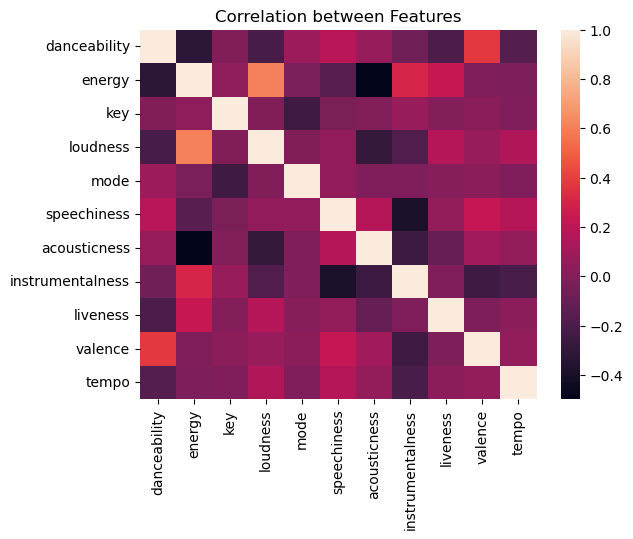

In [30]:
ax = sns.heatmap(xtrain.corr()).set(title = "Correlation between Features")

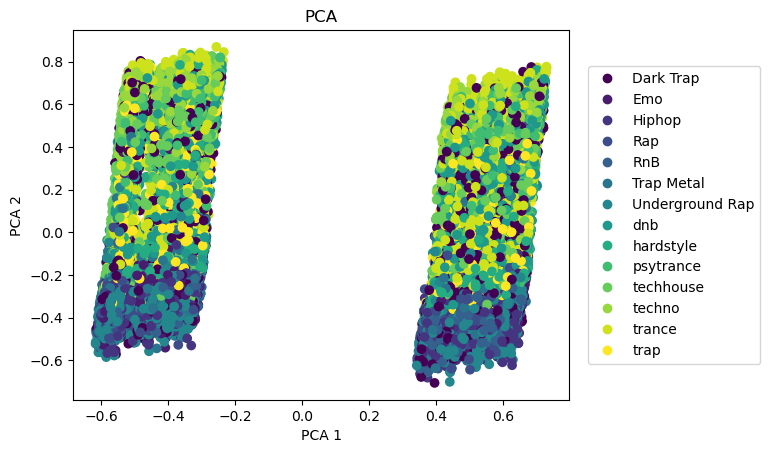

In [31]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x, y)
plot_pca = plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
handles, labels = plot_pca.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
_ = plt.title("PCA")

C:\tools\anacondaa\Lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\tools\anacondaa\Lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


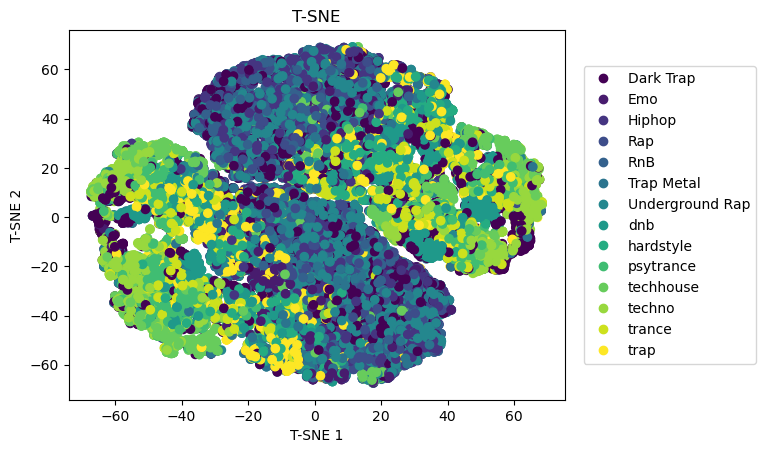

In [32]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x, y)
plot_tsne = plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)
handles, labels = plot_tsne.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("T-SNE 1")
plt.ylabel("T-SNE 2")
_ = plt.title("T-SNE")

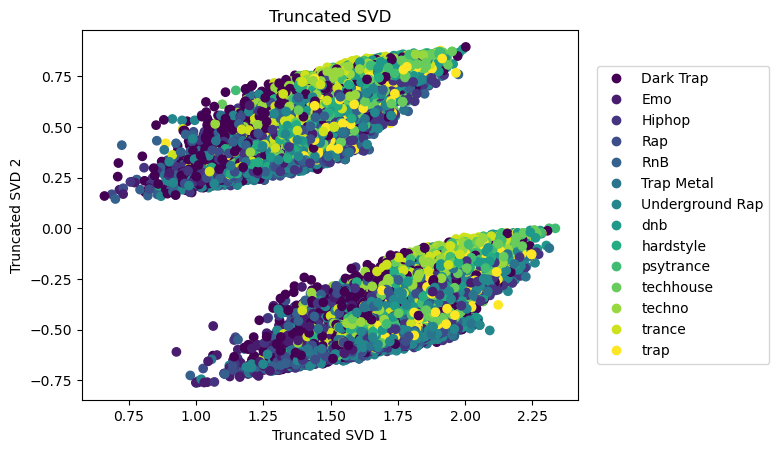

In [33]:
svd = TruncatedSVD(n_components=2)
x_svd = svd.fit_transform(x, y)
plot_svd = plt.scatter(x_svd[:,0], x_svd[:,1], c=y)
handles, labels = plot_svd.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("Truncated SVD 1")
plt.ylabel("Truncated SVD 2")
_ = plt.title("Truncated SVD")

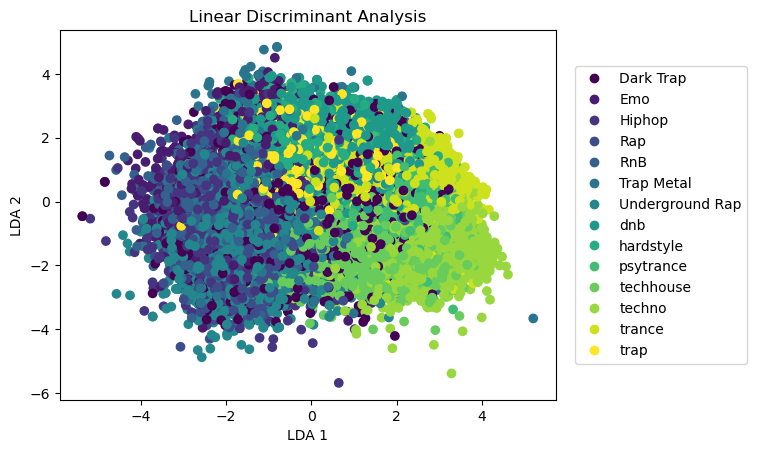

In [34]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(x, y.values.ravel())
plot_lda = plt.scatter(x_lda[:,0], x_lda[:,1], c=y)
handles, labels = plot_lda.legend_elements()
lg = plt.legend(handles, list(np.unique(y_org)), loc = 'center right', bbox_to_anchor=(1.4, 0.5))
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
_ = plt.title("Linear Discriminant Analysis")

In [35]:
"""
iso = Isomap(n_components=2)
x_iso = iso.fit_transform(xtrain, ytrain)
plot_iso = plt.scatter(x_iso[:,0], x_iso[:,1], c=ytrain)

mds = MDS(n_components=2)
x_mds = mds.fit_transform(xtrain, ytrain)
plot_mds = plt.scatter(x_mds[:,0], x_mds[:,1], c=ytrain)

ker = KernelPCA(n_components=2)
x_ker = ker.fit_transform(xtrain, ytrain)
plot_ker = plt.scatter(x_ker[:,0], x_ker[:,1], c=ytrain)
handles, labels = plot_ker.legend_elements()
plt.legend(handles, list(np.unique(y_train)), loc = 'upper right')
"""

"\niso = Isomap(n_components=2)\nx_iso = iso.fit_transform(xtrain, ytrain)\nplot_iso = plt.scatter(x_iso[:,0], x_iso[:,1], c=ytrain)\n\nmds = MDS(n_components=2)\nx_mds = mds.fit_transform(xtrain, ytrain)\nplot_mds = plt.scatter(x_mds[:,0], x_mds[:,1], c=ytrain)\n\nker = KernelPCA(n_components=2)\nx_ker = ker.fit_transform(xtrain, ytrain)\nplot_ker = plt.scatter(x_ker[:,0], x_ker[:,1], c=ytrain)\nhandles, labels = plot_ker.legend_elements()\nplt.legend(handles, list(np.unique(y_train)), loc = 'upper right')\n"

In [36]:
df = df.replace("Trap Metal", "Rap")
df = df.replace("Underground Rap", "Rap")
df = df.replace("Emo", "Rap")
df = df.replace("RnB", "Rap")
df = df.replace("Hiphop", "Rap")
df = df.replace("Dark Trap", "Rap")

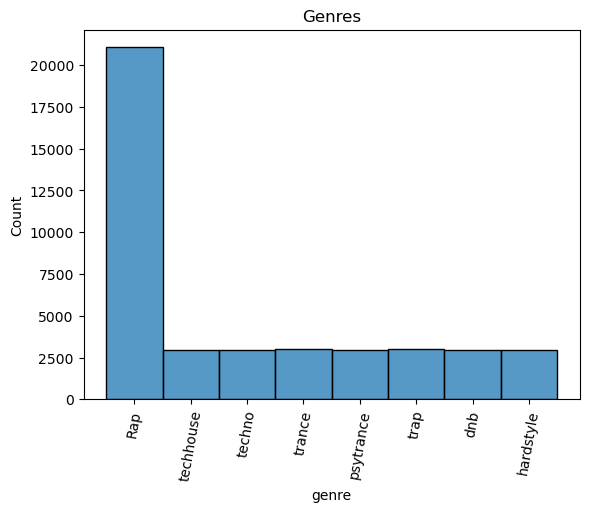

In [37]:
ax = sns.histplot(df["genre"])
_ = plt.xticks(rotation=80)
_ = plt.title("Genres")

In [38]:
rows_drop = []
for i in range(len(df)):
    if df.iloc[i]['genre'] == 'Rap':
        if random.random()<0.85:
            rows_drop.append(i)
df.drop(index = rows_drop,  inplace=True)

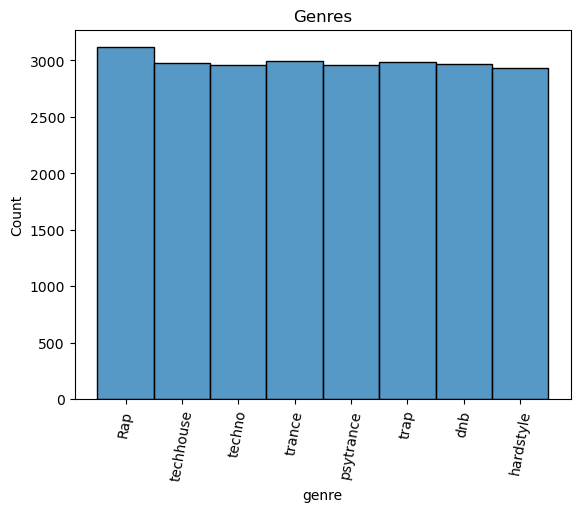

In [39]:
ax = sns.histplot(df["genre"])
_ = plt.xticks(rotation=80)
_ = plt.title("Genres")

In [40]:
x = df.loc[:,:"tempo"]
y = df["genre"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state=42, shuffle = True)

col = xtrain.columns
scalerx = MinMaxScaler()

xtrain = scalerx.fit_transform(xtrain)
xtest = scalerx.transform(xtest)

xtrain = pd.DataFrame(xtrain, columns = col)
xtest = pd.DataFrame(xtest, columns = col)

le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.transform(ytest)

x = pd.concat([xtrain, xtest], axis = 0)
y = pd.concat([pd.DataFrame(ytrain), pd.DataFrame(ytest)], axis = 0)

y_train = le.inverse_transform(ytrain)
y_test = le.inverse_transform(ytest)
y_org = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)], axis = 0)

In [41]:
early_stopping1 = keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                               patience = 10, restore_best_weights = True)
early_stopping2 = keras.callbacks.EarlyStopping(monitor = "val_accuracy", 
                                               patience = 10, restore_best_weights = True)

model = keras.Sequential([
    keras.layers.Input(name = "input", shape = (xtrain.shape[1])),
    keras.layers.Dense(256, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.Dense(128, activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(max(ytrain)+1, activation = "softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [42]:
model.compile(optimizer = keras.optimizers.Adam(),
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

model_history = model.fit(xtrain, ytrain,
                epochs = 100,
                verbose = 1, batch_size = 128,
                validation_data = (xtest, ytest),
                callbacks = [early_stopping1, early_stopping2])

Epoch 1/100
150/150 [==============================] - 3s 7ms/step - loss: 0.9959 - accuracy: 0.6498 - val_loss: 1.9539 - val_accuracy: 0.2515
Epoch 2/100
150/150 [==============================] - 1s 5ms/step - loss: 0.6007 - accuracy: 0.7855 - val_loss: 1.9901 - val_accuracy: 0.3320
Epoch 3/100
150/150 [==============================] - 1s 5ms/step - loss: 0.5322 - accuracy: 0.8078 - val_loss: 1.0280 - val_accuracy: 0.6123
Epoch 4/100
150/150 [==============================] - 1s 5ms/step - loss: 0.4995 - accuracy: 0.8186 - val_loss: 0.4398 - val_accuracy: 0.8412
Epoch 5/100
150/150 [==============================] - 1s 5ms/step - loss: 0.4811 - accuracy: 0.8231 - val_loss: 0.4022 - val_accuracy: 0.8527
Epoch 6/100
150/150 [==============================] - 1s 6ms/step - loss: 0.4673 - accuracy: 0.8273 - val_loss: 0.3860 - val_accuracy: 0.8544
Epoch 7/100
150/150 [==============================] - 1s 5ms/step - loss: 0.4482 - accuracy: 0.8343 - val_loss: 0.3909 - val_accuracy: 0.8533

In [43]:
print(model.evaluate(xtrain, ytrain))
print(model.evaluate(xtest, ytest))

598/598 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8789
[0.33288249373435974, 0.8788972496986389]
150/150 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.8699
[0.3473470211029053, 0.8698744773864746]


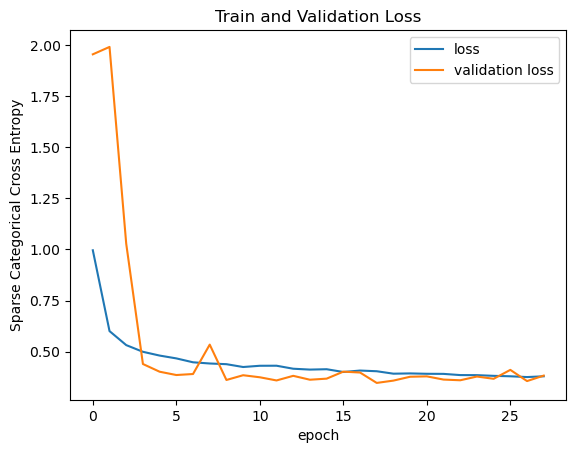

In [44]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.legend(["loss", "validation loss"], loc ="upper right")
plt.title("Train and Validation Loss")
plt.xlabel("epoch")
plt.ylabel("Sparse Categorical Cross Entropy")
plt.show()

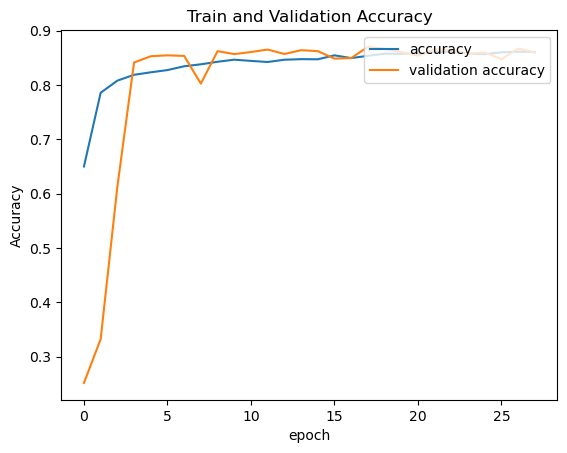

In [45]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.legend(["accuracy", "validation accuracy"], loc ="upper right")
plt.title("Train and Validation Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.show()

In [46]:
ypred = model.predict(xtest).argmax(axis=1)

150/150 [==============================] - 1s 2ms/step


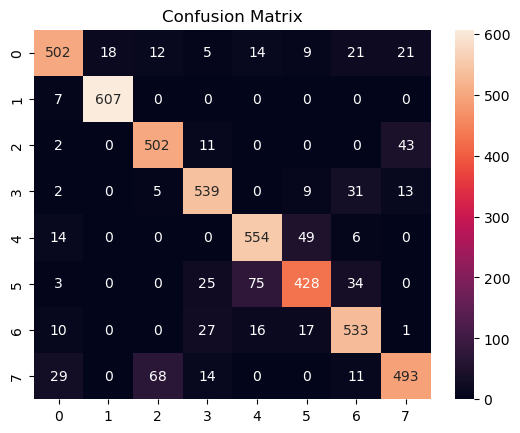

In [47]:
cf_matrix = metrics.confusion_matrix(ytest, ypred)
_ = sns.heatmap(cf_matrix, fmt=".0f", annot=True)
_ = plt.title("Confusion Matrix")

In [48]:
print(metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       602
           1       0.97      0.99      0.98       614
           2       0.86      0.90      0.88       558
           3       0.87      0.90      0.88       599
           4       0.84      0.89      0.86       623
           5       0.84      0.76      0.79       565
           6       0.84      0.88      0.86       604
           7       0.86      0.80      0.83       615

    accuracy                           0.87      4780
   macro avg       0.87      0.87      0.87      4780
weighted avg       0.87      0.87      0.87      4780

